<a href="https://colab.research.google.com/github/NeelNaik29/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Neel-Naik/blob/main/Zomato_Restaurant_Clustering_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

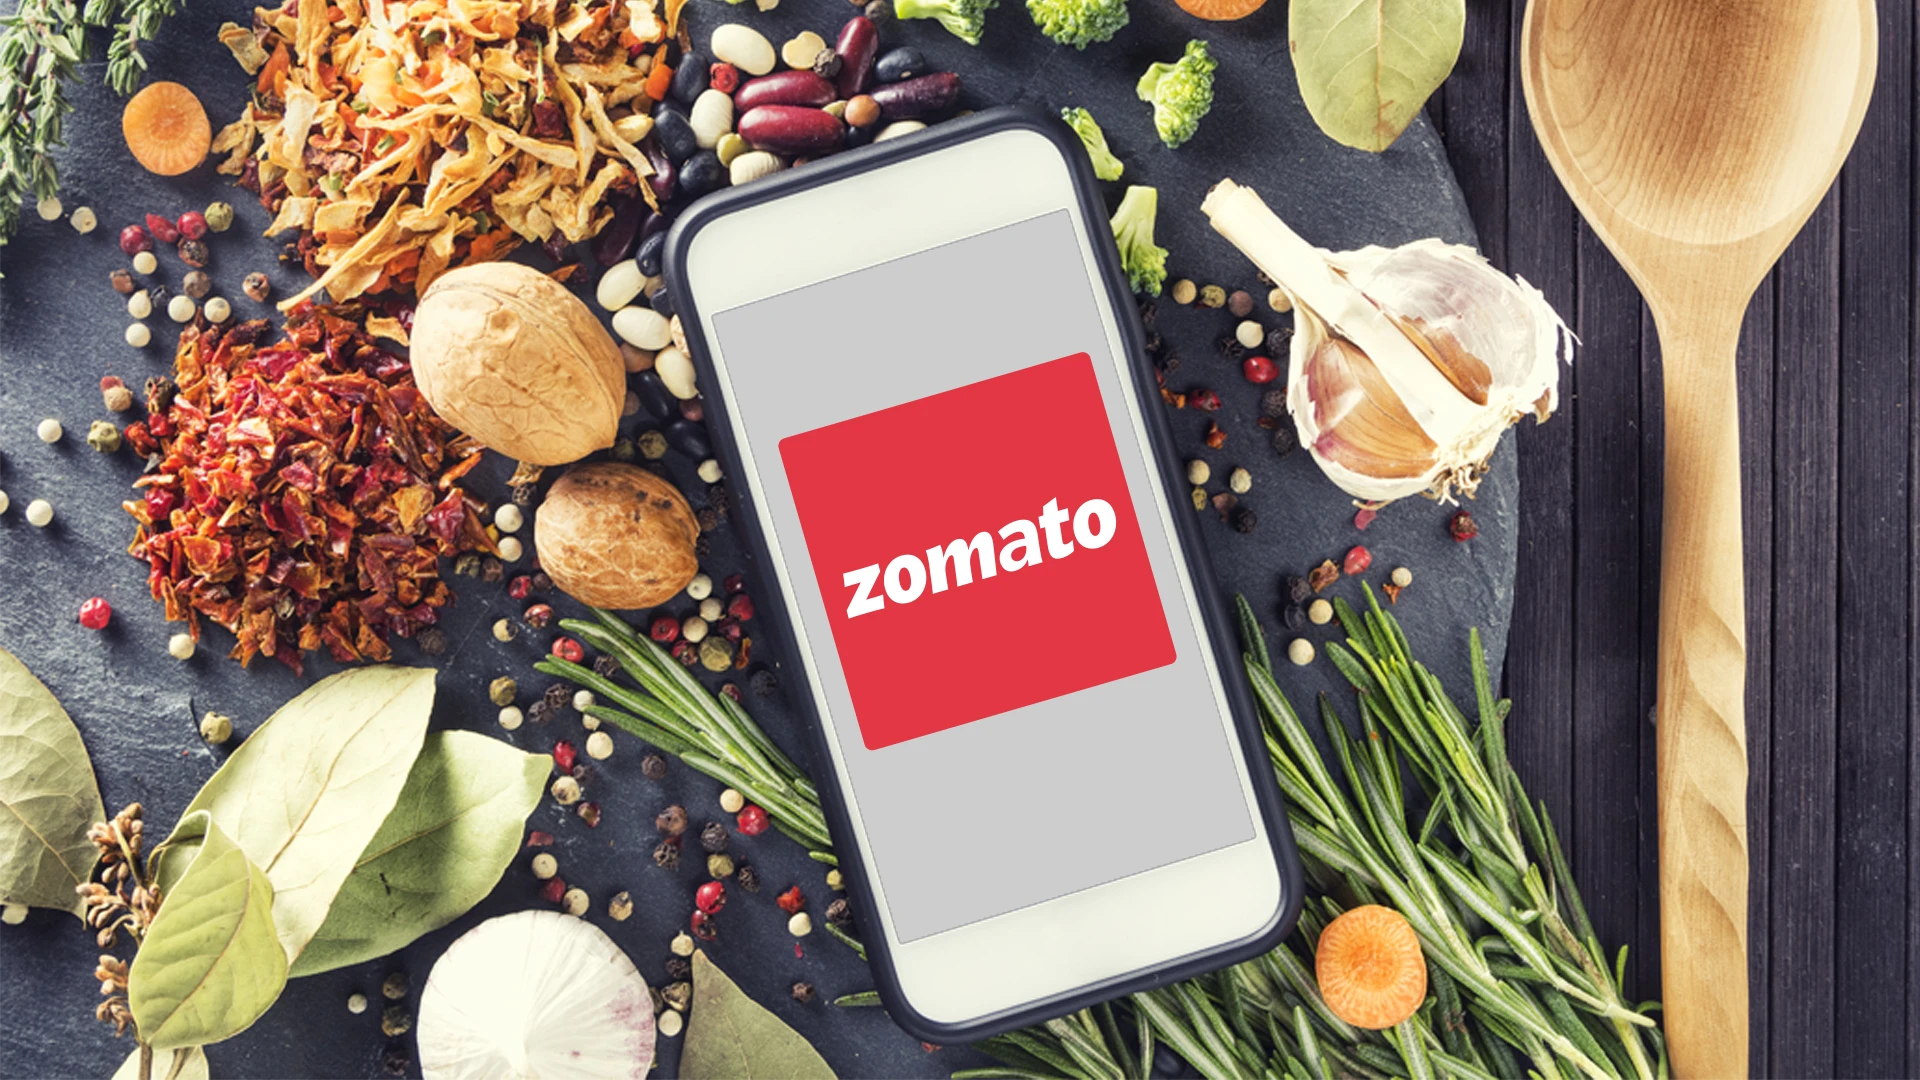

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Created By**      - Neel Naik


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/NeelNaik29/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Neel-Naik

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India. 

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases
that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment
analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from random import randint
import math

import plotly.express as px
from matplotlib.pyplot import figure, savefig, show, subplots, Axes, title
import scipy
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.figure_factory as ff
import missingno as msno 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

# default='warn'. suppresing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset of reataurant info and meta data
df_restaurant = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project IV - Zomato Restaurant Clustering And Sentiment Analysis - Neel Naik/Dataset/Zomato Restaurant names and Metadata.csv')

# load Dataset of restaurant reviews
df_reviews = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project IV - Zomato Restaurant Clustering And Sentiment Analysis - Neel Naik/Dataset/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look

print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n' + ' ' * 87 + ' Head ' + ' ' * 87 + '\n')
df_restaurant.head()          #checking 1st 5 rows of the df

print('\n' + ' ' * 87 + ' Tail ' + ' ' * 87 + '\n')
df_restaurant.tail()          #checking last 5 rows of the df



print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n' + ' ' * 87 + ' Head ' + ' ' * 87 + '\n')
df_reviews.head()          #checking 1st 5 rows of the df

print('\n' + ' ' * 87 + ' Tail ' + ' ' * 87 + '\n\n')
df_reviews.tail()          #checking last 5 rows of the df

print('\n' + ' ' * 87 + ' Sample ' + ' ' * 87 + '\n\n')
df_reviews.sample(5)       #checking random 5 rows of the df


........................................................................... Restaurant Names And Metadata ...........................................................................


                                                                                        Head                                                                                        



Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...


                                                                                        Tail                                                                                        



Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight



................................................................................ Restaurant Reviews ................................................................................


                                                                                        Head                                                                                        



Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0


                                                                                        Tail                                                                                        




Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6


                                                                                        Sample                                                                                        




Restaurant         Reviewer  \
8324              GD's     F For FOODIE   
4277      Karachi Cafe    Shivam Khanna   
9950  Chinese Pavilion   Akanksha Ahuja   
5336   Diners Pavilion      Roshan Nair   
5599        Cafe Eclat  Abhirupa Lahiri   

                                                 Review Rating  \
8324  Visited the stall of this outlet at IBS last m...      4   
4277                  the whole package was upside down      4   
9950  Chinese Pavilion is one of the best Oriental r...      4   
5336  Went for a team lunch to this place and it was...      1   
5599  I haven't tried their ala carte menu but had a...      1   

                         Metadata             Time  Pictures  
8324    36 Reviews , 28 Followers  12/20/2018 9:57         1  
4277     2 Reviews , 25 Followers  7/29/2018 21:15         0  
9950  115 Reviews , 700 Followers   9/13/2017 7:29         5  
5336       2 Reviews , 1 Follower  12/29/2018 9:54         0  
5599   29 Reviews , 131 Followers   4/16/2018 0:06         0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n'  + ' Shape ' + '\n')

print(f'Rows: {df_restaurant.shape[0]}, Columns: {df_restaurant.shape[1]}\n')  


print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n' + ' Shape '  + '\n')

print(f'Rows: {df_reviews.shape[0]}, Columns: {df_reviews.shape[1]}\n')  


........................................................................... Restaurant Names And Metadata ...........................................................................


 Shape 

Rows: 105, Columns: 6



................................................................................ Restaurant Reviews ................................................................................


 Shape 

Rows: 10000, Columns: 7



### Dataset Information And Description

In [6]:
# Dataset Info and describe
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n' + ' Info ' + '\n')
df_restaurant.info()          #information about the df

print('\n' + ' Describe ' + '\n')
df_restaurant.describe()      #information about the df


print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n' + ' Info ' + '\n')
df_reviews.info()            #information about the df

print('\n' + ' Describe ' + '\n')
df_reviews.describe()        #information about the df


........................................................................... Restaurant Names And Metadata ...........................................................................


 Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

 Describe 



Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6



................................................................................ Restaurant Reviews ................................................................................


 Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB

 Describe 



Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

#### Duplicate Values

In [7]:

# Dataset Duplicate Value Count

print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

# To find the duplicate values
print('Total number of duplicate data is :',df_restaurant.duplicated().sum())


print('\n\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

# To find the duplicate values
print('Total number of duplicate data is :',df_reviews.duplicated().sum())


........................................................................... Restaurant Names And Metadata ...........................................................................

Total number of duplicate data is : 0


................................................................................ Restaurant Reviews ................................................................................

Total number of duplicate data is : 36


#### Missing Values/Null Values

In [8]:
def null_value_persentage(df):
  np = pd.DataFrame()

  null_persentage = round((df.isnull().sum()/len(df)) * 100, 2)

  np['Col_name'] = df.columns
  np['%'] = list(round((df.isnull().sum()/len(df)) * 100, 2))

  return np[np['%'] > 0]

In [9]:
# Missing Values/Null Values Count
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')

print('\n'+ ' Null Values Count ' + '\n')
df_restaurant.isnull().sum()    #sum of the null values

print('\n\n'  + ' Null Values % '  + '\n')
null_value_persentage(df_restaurant)


print('\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')

print('\n'+ ' Null Values Count ' + '\n')
df_reviews.isnull().sum()    #sum of the null values

print('\n\n'  + ' Null Values % '  + '\n')
null_value_persentage(df_reviews)


........................................................................... Restaurant Names And Metadata ...........................................................................


 Null Values Count 



Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64



 Null Values % 



Col_name      %
3  Collections  51.43
5      Timings   0.95


................................................................................ Restaurant Reviews ................................................................................


 Null Values Count 



Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64



 Null Values % 



Col_name     %
1  Reviewer  0.38
2    Review  0.45
3    Rating  0.38
4  Metadata  0.38
5      Time  0.38


........................................................................... Restaurant Names And Metadata ...........................................................................



<Axes: >

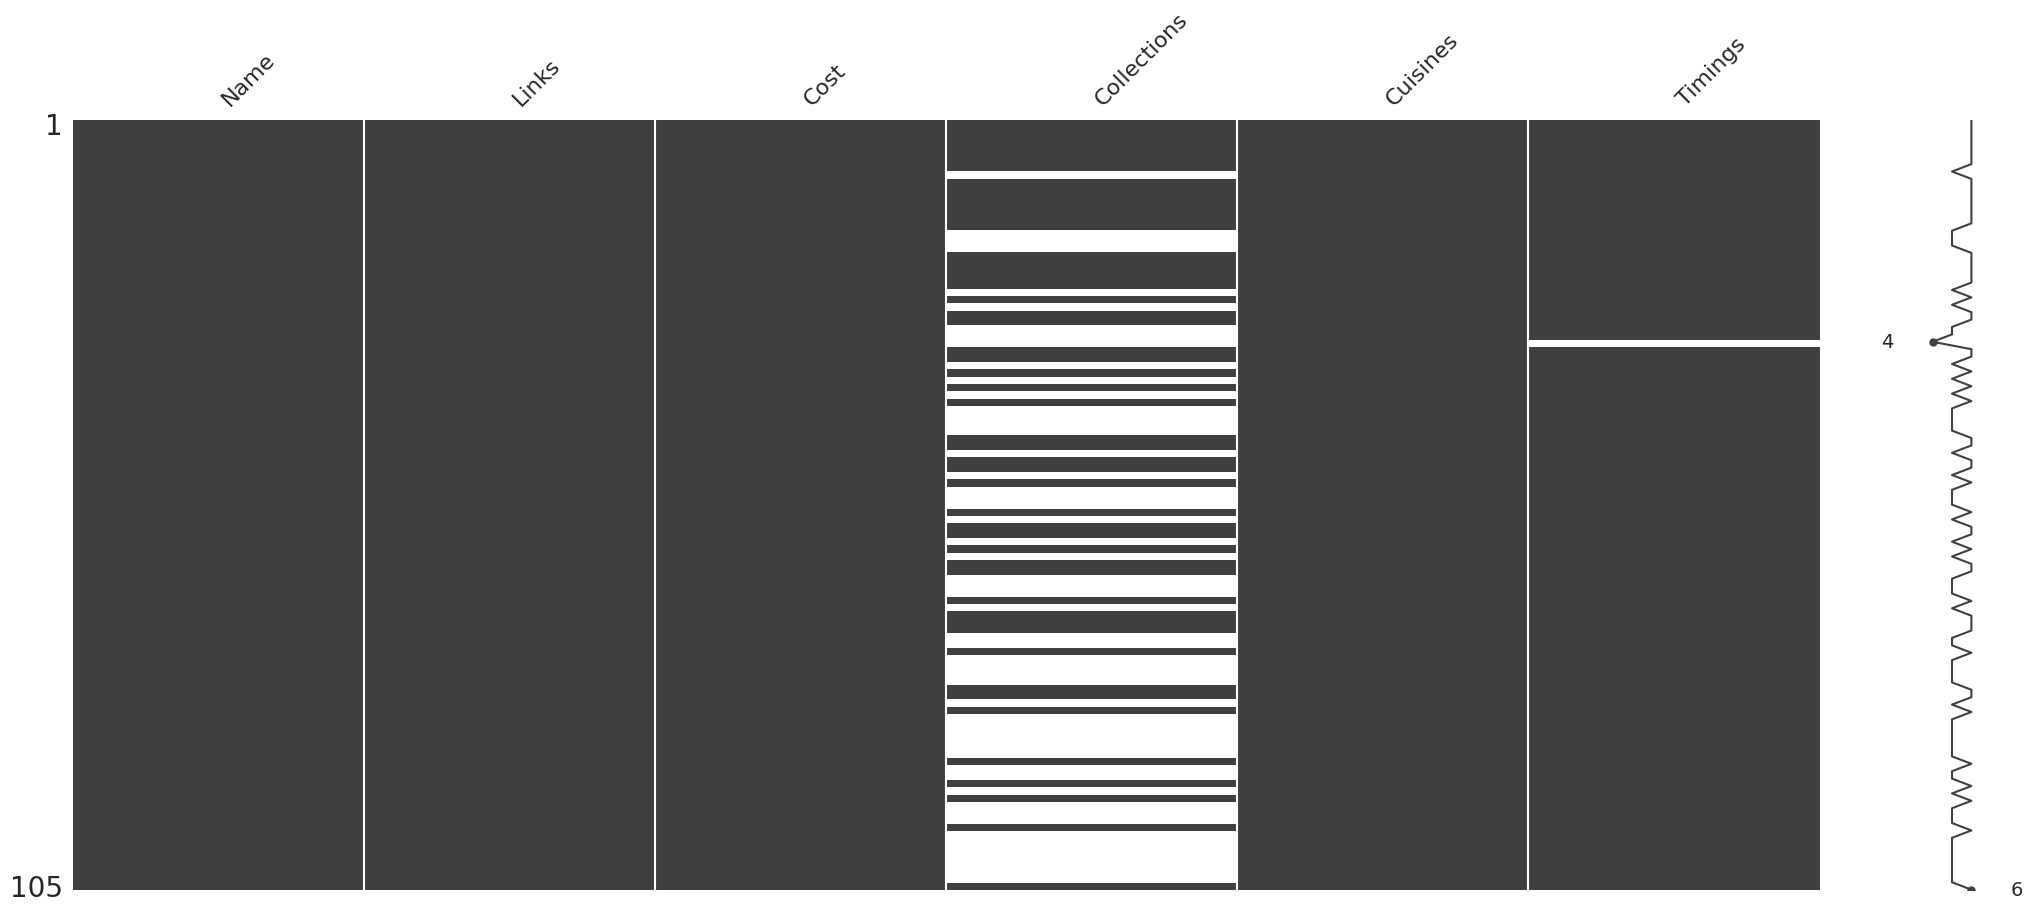

In [10]:
# Visualizing the missing values
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')
msno.matrix(df_restaurant)


................................................................................ Restaurant Reviews ................................................................................



<Axes: >

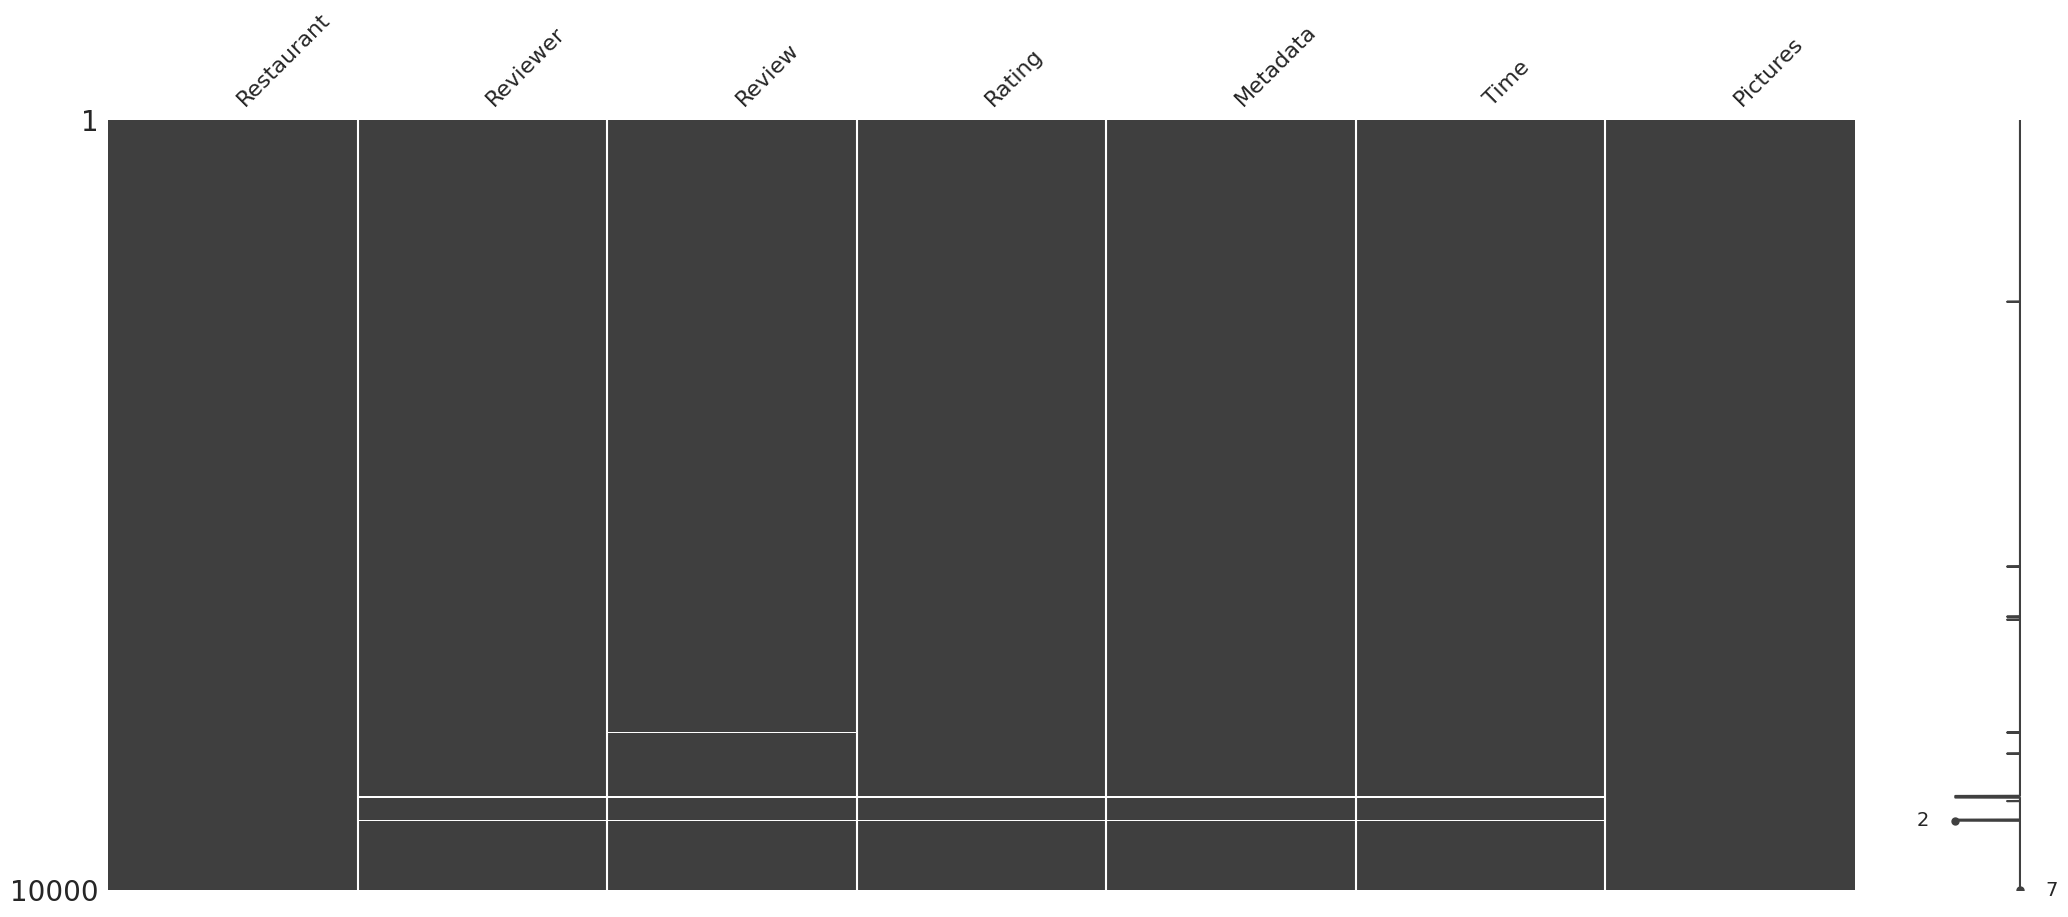

In [11]:
# Visualizing the missing values
print('\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')
msno.matrix(df_reviews)

In [12]:
# Retrieve rows where the 'Review' column has null values
df_reviews[df_reviews['Review'].isnull()].head(10)

Restaurant                Reviewer Review Rating  \
2360                 Amul        Lakshmi Narayana    NaN      5   
5799         Being Hungry                   Surya    NaN      5   
6449      Hyderabad Chefs          Madhurimanne97    NaN      5   
6489      Hyderabad Chefs                  Harsha    NaN      5   
7954         Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228   Al Saba Restaurant                  Suresh    NaN      5   
8777  American Wild Wings                     NaN    NaN    NaN   
8778  American Wild Wings                     NaN    NaN    NaN   
8779  American Wild Wings                     NaN    NaN    NaN   
8780  American Wild Wings                     NaN    NaN    NaN   

                     Metadata             Time  Pictures  
2360                0 Reviews  7/29/2018 18:00         0  
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0  
6449                 1 Review  7/23/2018 16:29         0  
6489                 1 Review   7/8/2018 21:19         0  
7954    1 Review , 1 Follower   8/9/2018 23:25         0  
8228                 1 Review  7/20/2018 22:42         0  
8777                      NaN              NaN         0  
8778                      NaN              NaN         0  
8779                      NaN              NaN         0  
8780                      NaN              NaN         0

### What did you know about your dataset?

#### **Restaurant Names And Metadata**:


*   This Dataset contains information about the 105 restaurants like the cost, timings and Cuisines.
*   All of the columns have data type of object. So we need to Change column 'Cost' to int

*  Column 'Collections' can be droped as it has more than half of its data missing. 

#### **Restaurant Reviews**:


*   This Dataset have 10,000 reviews of the 105 restaurant names from the other dataset.
*  we need to change 'Rating' to float and 'Time' to datetime. Other than that  'Pictures' is in int and other are object datatypes respectively.

*   It has 38 rows which have missing values in the same row index which can be droped as it contributes to less than 1% of the data.









## ***2. Understanding Your Variables***

### Variables Description 

#### **Restaurant Names And Metadata**:

Name: Name of Restaurants

Links: URL Links of Restaurants

Cost: Per person estimated cost of dining

Collection: Tagging of Restaurants w.r.t. Zomato categories

Cuisines: Cuisines served by restaurants

Timings: Restaurant timings

--------------------------

#### **Restaurant Reviews**:

Reviewer: Name of the reviewer

review: Review text

Rating: Rating provided

MetaData: Reviewer metadata-No of reviews and followers

Time: Date and Time of Review

Pictures: No of pictures posted with review.






### Check Unique Values for each variable.

In [13]:

def unique_values(df):
  # Iterate over columns and print unique values
  for column in df.columns:
      unique_values = df[column].unique()
      print(f"Unique values for {column}:")
      print(unique_values)
      print()


In [14]:
# Check Unique Values for each variable.
print('\n' + '.' * 75 + ' \033[1mRestaurant Names And Metadata\033[0m ' + '.' * 75 + '\n')
unique_values(df_restaurant)

print('\n' + '.' * 80 + ' \033[1mRestaurant Reviews\033[0m ' + '.' * 80 + '\n')
unique_values(df_reviews)


........................................................................... Restaurant Names And Metadata ...........................................................................

Unique values for Name:
['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Rest

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

In [16]:
# fixing the null values in restaurant df

# Drop the 'Collections' column from the DataFrame
df_restaurant.drop(['Collections'], axis=1, inplace=True)

# Convert the 'Cost' column to int data type
df_restaurant['Cost'] = df_restaurant['Cost'].str.replace(',', '').astype(int)

# Find the mode value for the 'Timings' column
filler = df_restaurant['Timings'].mode()[0]

# Replace NaN values in the 'Timings' column with the mode value
df_restaurant['Timings'] = df_restaurant['Timings'].fillna(filler)

In [17]:
# Call the function with the 'df_restaurant' DataFrame
null_value_persentage(df_restaurant)

Empty DataFrame
Columns: [Col_name, %]
Index: []

In [18]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


No null values remaining in the DF restaurant



In [19]:
# fixing the null values in review df

# Find the row indices where 'Reviewer' column is null
null_row_index = df_reviews[df_reviews['Reviewer'].isnull()].index.tolist()

# Drop rows with null values in 'Reviewer' column
df_reviews.drop(null_row_index, inplace=True)

In [20]:
df_reviews.reset_index(inplace= True, drop = True )

In [21]:
# Retrieve rows where the 'Review' column has null values
df_reviews[df_reviews['Review'].isnull()]

Restaurant                Reviewer Review Rating  \
2360                Amul        Lakshmi Narayana    NaN      5   
5799        Being Hungry                   Surya    NaN      5   
6449     Hyderabad Chefs          Madhurimanne97    NaN      5   
6489     Hyderabad Chefs                  Harsha    NaN      5   
7954        Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228  Al Saba Restaurant                  Suresh    NaN      5   
8821      Domino's Pizza             Sayan Gupta    NaN      5   

                     Metadata             Time  Pictures  
2360                0 Reviews  7/29/2018 18:00         0  
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0  
6449                 1 Review  7/23/2018 16:29         0  
6489                 1 Review   7/8/2018 21:19         0  
7954    1 Review , 1 Follower   8/9/2018 23:25         0  
8228                 1 Review  7/20/2018 22:42         0  
8821  2 Reviews , 2 Followers   8/9/2018 21:41         0

In [22]:
# Replace the 'Like' values in the 'Rating' column with 4
df_reviews['Rating'][df_reviews['Rating'] == 'Like'] = 4

# Convert the 'Rating' column to float data type
df_reviews['Rating'] = df_reviews['Rating'].astype(float)

# Convert the 'Time' column to DateTime data type
df_reviews['Time'] = pd.to_datetime(df_reviews['Time'])

In [23]:
print('Value count when review = 3\n')
# Count the frequency of reviews for rows where the rating is 3
df_reviews['Review'][df_reviews['Rating'] == 3].value_counts().head()

print('\n\nValue count when review = 5\n')
# Count the frequency of reviews for rows where the rating is 5
df_reviews['Review'][df_reviews['Rating'] == 5].value_counts().head()

Value count when review = 3



good             10
average           3
ok                3
quantity less     2
too oily          2
Name: Review, dtype: int64



Value count when review = 5



good         180
Good          41
nice          22
very good     22
excellent     20
Name: Review, dtype: int64

In [24]:
# Replace null values in the 'Review' column with 'good'
df_reviews['Review'].fillna('good', inplace=True)

In [25]:
df_reviews['Total_Review'], df_reviews['Followers'] = df_reviews['Metadata'].str.split(',').str
df_reviews['Total_Review'] = pd.to_numeric(df_reviews['Total_Review'].str.split(' ').str[0])
df_reviews['Followers'] = pd.to_numeric(df_reviews['Followers'].str.split(' ').str[1])
df_reviews.drop(['Metadata'], axis = 1, inplace = True)

In [26]:
# Call the function with the 'df_reviews' DataFrame
null_value_persentage(df_reviews)

Col_name      %
7  Followers  15.84

In [29]:
df_reviews[df_reviews['Followers'].isnull()].head()

Restaurant         Reviewer  \
5   Beyond Flavours    Nagabhavani K   
6   Beyond Flavours  Jamuna Bhuwalka   
7   Beyond Flavours        Sandhya S   
14  Beyond Flavours    Kankaria.ritu   
24  Beyond Flavours    Amritap Datta   

                                               Review  Rating  \
5   Ambiance is good, service is good, food is aPr...     5.0   
6   Its a very nice place, ambience is different, ...     5.0   
7   Well after reading so many reviews finally vis...     4.0   
14  We ordered corn cheese balls, manchow soup and...     1.0   
24  Excellent experience, mouthwatering food, good...     5.0   

                  Time  Pictures  Total_Review  Followers  
5  2019-05-24 15:22:00         0             1        NaN  
6  2019-05-24 01:02:00         0             1        NaN  
7  2019-05-23 15:01:00         0             1        NaN  
14 2019-05-22 21:19:00         0             1        NaN  
24 2019-05-20 23:33:00         0             1        NaN

In [30]:
# Replace null values in the 'Review' column with 'good'
df_reviews['Followers'].fillna(0, inplace=True)

In [31]:
# Call the function with the 'df_reviews' DataFrame
null_value_persentage(df_reviews)

Empty DataFrame
Columns: [Col_name, %]
Index: []

No null values remaining in DF reviews.

In [32]:
df_reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Total_Review  Followers  
0 2019-05-25 15:54:00         0             1        2.0  
1 2019-05-25 14:20:00         0             3        2.0  
2 2019-05-24 22:54:00         0             2        3.0  
3 2019-05-24 22:11:00         0             1        1.0  
4 2019-05-24 21:37:00         0             3        2.0

In [33]:
# merge both the df on restaurant names to make the EDA easy.
df_restaurant.rename(columns={'Name': 'Restaurant'}, inplace=True)
df = pd.merge(df_reviews, df_restaurant, on = 'Restaurant')

In [34]:

# Split the Time columns into Year Month and Hours
df['Year'] = pd.DatetimeIndex(df['Time']).year
df['Month'] = pd.DatetimeIndex(df['Time']).month
df['Week'] = pd.DatetimeIndex(df['Time']).week
df['Day'] = pd.DatetimeIndex(df['Time']).day
df['Hour'] = pd.DatetimeIndex(df['Time']).hour

In [35]:
df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Total_Review  Followers  \
0 2019-05-25 15:54:00         0             1        2.0   
1 2019-05-25 14:20:00         0             3        2.0   
2 2019-05-24 22:54:00         0             2        3.0   
3 2019-05-24 22:11:00         0             1        1.0   
4 2019-05-24 21:37:00         0             3        2.0   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Year  Month  Week  Day  Hour  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   25    15  
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   25    14  
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   24    22  
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   24    22  
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   24    21

In [36]:
df.tail()

Restaurant          Reviewer  \
9957  Chinese Pavilion  Abhishek Mahajan   
9958  Chinese Pavilion    Sharad Agrawal   
9959  Chinese Pavilion         Ramandeep   
9960  Chinese Pavilion   Nayana Shanbhag   
9961  Chinese Pavilion  Bhargava Krishna   

                                                 Review  Rating  \
9957  Madhumathi Mahajan Well to start with nice cou...     3.0   
9958  This place has never disappointed us.. The foo...     4.5   
9959  Bad rating is mainly because of "Chicken Bone ...     1.5   
9960  I personally love and prefer Chinese Food. Had...     4.0   
9961  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures  Total_Review  Followers  \
9957 2016-06-05 00:08:00         0            53       54.0   
9958 2016-06-04 22:01:00         0             2       53.0   
9959 2016-06-03 10:37:00         3            65      423.0   
9960 2016-05-31 17:22:00         0            13      144.0   
9961 2016-05-31 16:41:00         6           472     1302.0   

                                                  Links  Cost  \
9957  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9958  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9959  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9960  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9961  https://www.zomato.com/hyderabad/chinese-pavil...  1000   

              Cuisines                            Timings  Year  Month  Week  \
9957  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM  2016      6    22   
9958  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM  2016      6    22   
9959  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM  2016      6    22   
9960  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM  2016      5    22   
9961  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM  2016      5    22   

      Day  Hour  
9957    5     0  
9958    4    22  
9959    3    10  
9960   31    17  
9961   31    16

In [37]:
df.shape

(9962, 17)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9961
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Restaurant    9962 non-null   object        
 1   Reviewer      9962 non-null   object        
 2   Review        9962 non-null   object        
 3   Rating        9962 non-null   float64       
 4   Time          9962 non-null   datetime64[ns]
 5   Pictures      9962 non-null   int64         
 6   Total_Review  9962 non-null   int64         
 7   Followers     9962 non-null   float64       
 8   Links         9962 non-null   object        
 9   Cost          9962 non-null   int64         
 10  Cuisines      9962 non-null   object        
 11  Timings       9962 non-null   object        
 12  Year          9962 non-null   int64         
 13  Month         9962 non-null   int64         
 14  Week          9962 non-null   int64         
 15  Day           9962 non-null   int64   

### What all manipulations have you done and insights you found?

#### For Restaurant DF:

*   Droped the 'Colections' column.
*   Changed DType of 'Cost' column to 'int'.
*   Filled the missing value in 'Timings' coloumn with mode.

#### For Review DF:

*   Droped the rows which had missing values in more than 2 columns.
*   In the rating column, assigned 'Like' Str to 4 (assumption) and changed the Dtype to 'float'.
*   Changed Dtype of 'Time' column to DateTime.
*   In 'Review' column filled missing value with mode. 

Mearged both the DF based upon the Restaurant names so it will be easy for further analysis.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 to 5 (Univariate Analysis)

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Rating', ylabel='Percent'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Cost', ylabel='Percent'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Pictures', ylabel='Percent'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Time', ylabel='Percent'>

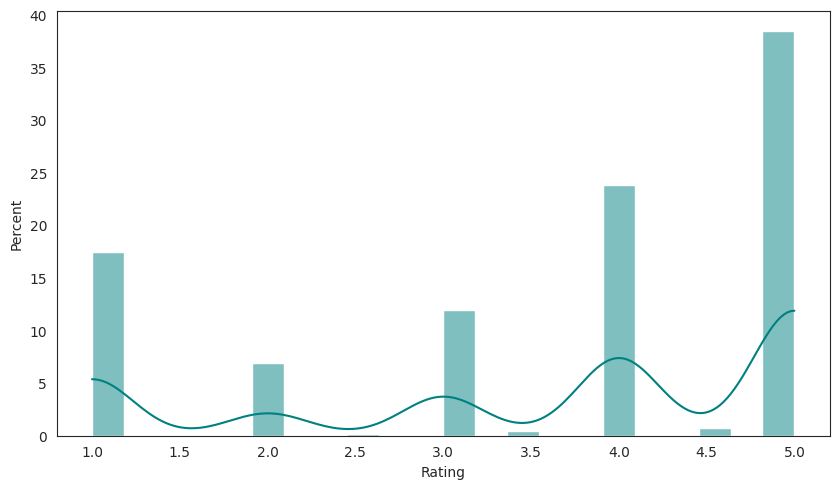

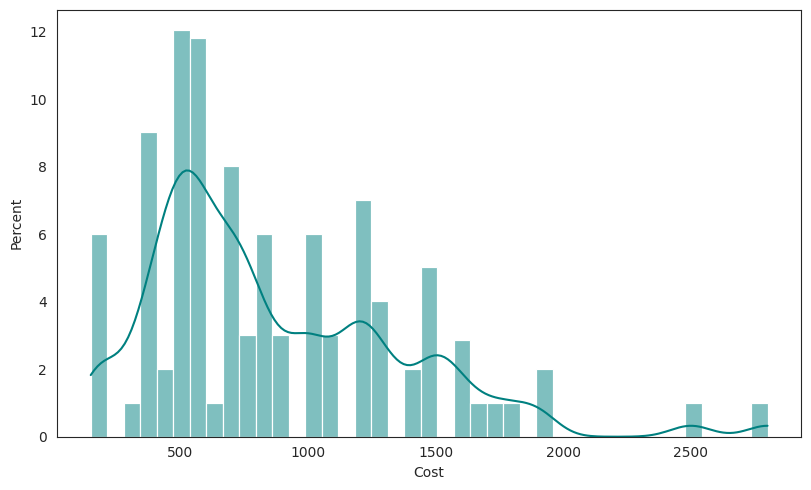

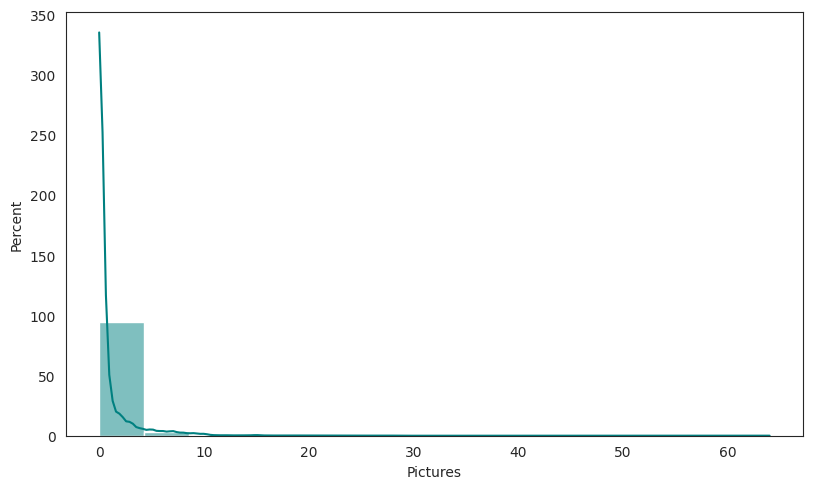

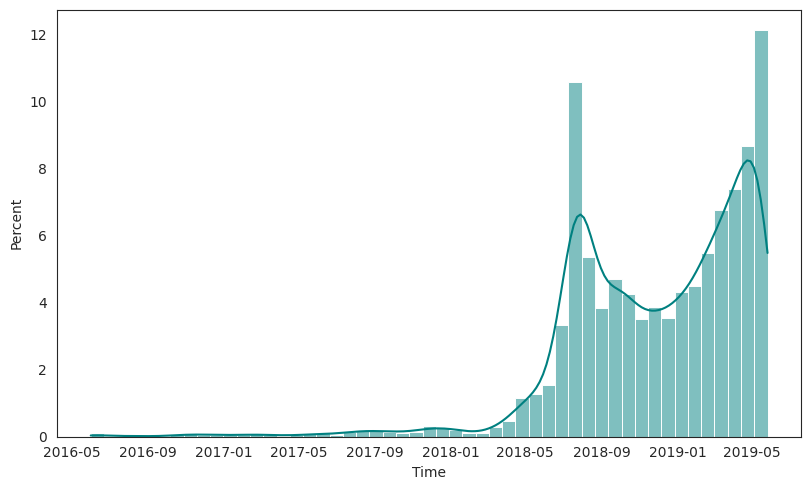

In [39]:
# Chart - 1 visualization code
for i,j in zip(['Rating','Cost','Pictures','Time'],range(1,5)):
  plt.subplots(figsize=(40, 5))
  plt.subplot(1,5,j)
  sns.histplot(df[i], stat = 'percent', kde = True, color = 'Teal')
  plt.tight_layout()

In [40]:
# store type of food in a a list with spliting all the food
cuisine_list = df_restaurant.Cuisines.str.split(', ')

# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 
# converting the dict to a data frame 
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})
cuisine_df.sort_values(by = 'Number_of_Restaurants', ascending = False).head(10)

Type_of_Food  Number_of_Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15
7          Asian                     15
20       Italian                     14
9       Desserts                     13
4   South Indian                      9
29        Bakery                      7

([<matplotlib.patches.Wedge at 0x7fde6fa5b700>,
 [Text(0.7501537030945057, 0.936626618100084, 'North Indian'),
  Text(-0.8274672498025928, 0.7247744135275015, 'Chinese'),
  Text(-1.0734379481005547, -0.24027270252292734, 'Continental'),
  Text(-0.7947554636296155, -0.7605023031068843, 'Biryani'),
  Text(-0.37959229925279675, -1.0324290224262274, 'Fast Food'),
  Text(0.09676498074752628, -1.0957356152379691, 'Asian'),
  Text(0.5406505281013616, -0.9579650340506791, 'Italian'),
  Text(0.868576321795791, -0.6749630902617525, 'Desserts'),
  Text(1.03789012904006, -0.364395499479903, 'South Indian'),
  Text(1.0941970510655197, -0.11283976887392397, 'Bakery')],
 [Text(0.43758966013846157, 0.5463655272250489, '29%'),
  Text(-0.451345772619596, 0.395331498287728, '20%'),
  Text(-0.5855116080548479, -0.13105783773977855, '10%'),
  Text(-0.4335029801616084, -0.4148194380583005, '7%'),
  Text(-0.20705034504698003, -0.5631431031415784, '7%'),
  Text(0.05278089858955978, -0.5976739719479831, '7%'),

Text(0.5, 1.0, 'Top 10 Most Selling type of Foods')

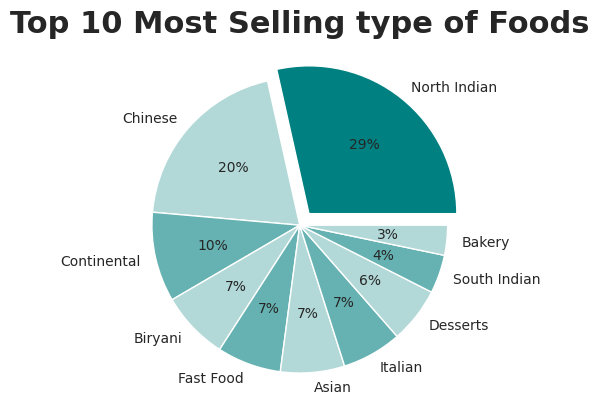

In [41]:

# Chart - 11 visualization code pie chart for top 10 most selling cuisine
cuisine_list = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Type_of_Food'].tolist()[:10]
data = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Number_of_Restaurants'].tolist()[:10]
labels = cuisine_list

#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%', explode = (0.1,0,0,0,0,0,0, 0, 0, 0), 
        colors = ['#008080', '#b2d8d8','#66b2b2', '#b2d8d8','#66b2b2', '#b2d8d8','#66b2b2', '#b2d8d8','#66b2b2', '#b2d8d8']);
plt.title('Top 10 Most Selling type of Foods', size =22, weight ='bold' )
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are used to visualize the distribution of a dataset by grouping data into bins and displaying the frequency or count of observations within each bin. Histograms are particularly useful for understanding the shape, central tendency, and spread of the data.

Pie plots are valuable for visualizing proportions and comparing categories when the data consists of categorical variables and the number of categories is manageable.

##### 2. What is/are the insight(s) found from the chart?

 

**Histogram**

  *   **Rating**
    *   Nearly 40% of the people give 5 star rating and 17 - 18 % people give 1 star rating.
    *  I.E More than 50% of the people give ratings on the extream positive or negatve end of the scale.

  *   **Cost**
    *   Most of the people consume food of arround 400 - 800 Rupee.
    *   As the Cost Increases no. of customers decreases.

  *   **Pictures**
    *   80 % of the customers do not upload pictures.
    *   This is not a relevant festure until we compare it with something.

  *   **Time**
    *   From around march of 2018 there is a clear increase in the customers using zomato for delivery.
    *   There is a huge breakout on Aug 2018 and May 2019.

**Pie Chart**



*   Cuisines
  *   Almost 30% of the restaurant have North Indian as one of their cuisine
  *   Where as Chinese and Continental share 20% and 10 % respectively. 





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by providing valuable information about customer ratings, cost preferences, picture uploads, and time trends. However, there are also insights that could potentially lead to negative growth. Let's analyze each insight:

1. **Rating**:
   - Positive Impact: The fact that nearly 40% of people give a 5-star rating suggests that a significant portion of customers is highly satisfied with their experience. This can contribute to positive word-of-mouth, customer retention, and attracting new customers.
   - Negative Impact: The observation that around 17-18% of people give a 1-star rating indicates a notable proportion of dissatisfied customers. Negative ratings can harm the reputation of the restaurants and the Zomato platform, leading to decreased customer trust and potential loss of business.

2. **Cost**:
   - Positive Impact: The understanding that most customers consume food in the range of 400-800 Rupees can help businesses tailor their offerings and pricing strategies accordingly. They can focus on providing value within this popular price range, attracting a larger customer base.
   - Negative Impact: The finding that the number of customers decreases as the cost increases suggests that higher-priced options may have limited demand. This could limit revenue potential or necessitate strategic efforts to differentiate the higher-priced offerings to justify the cost.

3. **Pictures**:
   - Positive Impact: While 80% of customers not uploading pictures may not directly impact business growth, it indicates an opportunity for businesses to encourage more customers to share visual content. Engaging customers to upload pictures of their positive experiences can enhance the overall dining experience, attract attention, and generate social proof.
   - Negative Impact: The absence of relevant pictures may limit the visual appeal of the platform and the ability to showcase the offerings, potentially impacting customer engagement and decision-making.

4. **Time**:
   - Positive Impact: The clear increase in customers using Zomato for delivery since March 2018 suggests a growing demand for food delivery services. This trend presents an opportunity for businesses to leverage and optimize their delivery capabilities to cater to this rising demand.
   - Negative Impact: While the breakout in August 2018 and May 2019 indicates significant growth, it could also indicate potential challenges or issues that resulted in a sudden increase in negative customer experiences during those periods. Identifying the causes behind these breakouts and addressing any negative factors promptly is crucial to maintaining positive growth.


5.   **Cuisines**
  *   Meet customer demand: North Indian cuisine is popular among almost 30% of the restaurants, indicating a high demand that businesses can cater to.
  *   Capitalize on popular cuisines: Chinese and Continental cuisines are offered by 20% and 10% of the restaurants, respectively, presenting growth opportunities for businesses specializing in these cuisines.
  *   Diversify and differentiate: Restaurants can stand out by introducing or emphasizing Chinese or Continental cuisine, attracting customers seeking these specific options.



To fully assess the positive or negative impact, it's essential to consider these insights within the context of specific business strategies, customer feedback, and market dynamics.



#### Chart - 6 & 7 (Bivariate Analysis)

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Year', ylabel='Rating'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Month', ylabel='Rating'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Day', ylabel='Rating'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Hour', ylabel='Rating'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Year', ylabel='Cost'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Month', ylabel='Cost'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Day', ylabel='Cost'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

<Axes: xlabel='Hour', ylabel='Cost'>

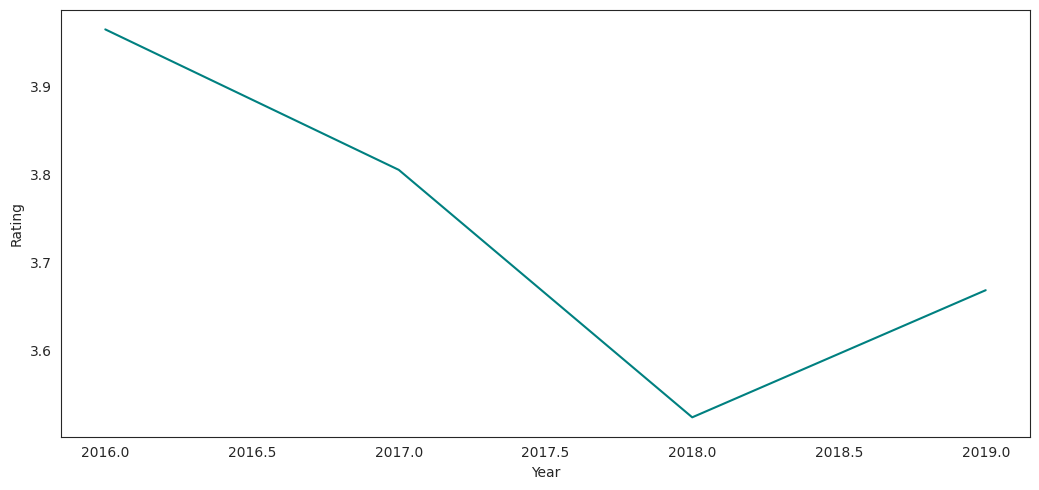

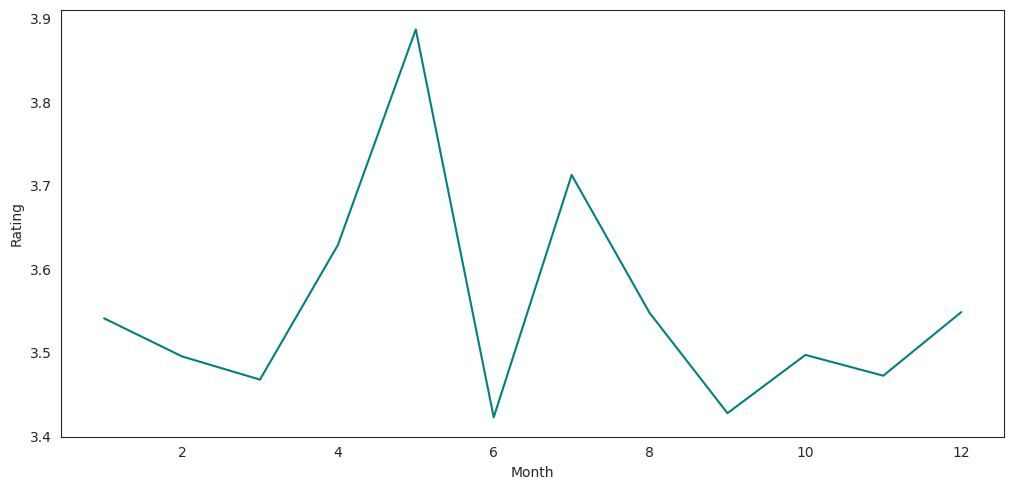

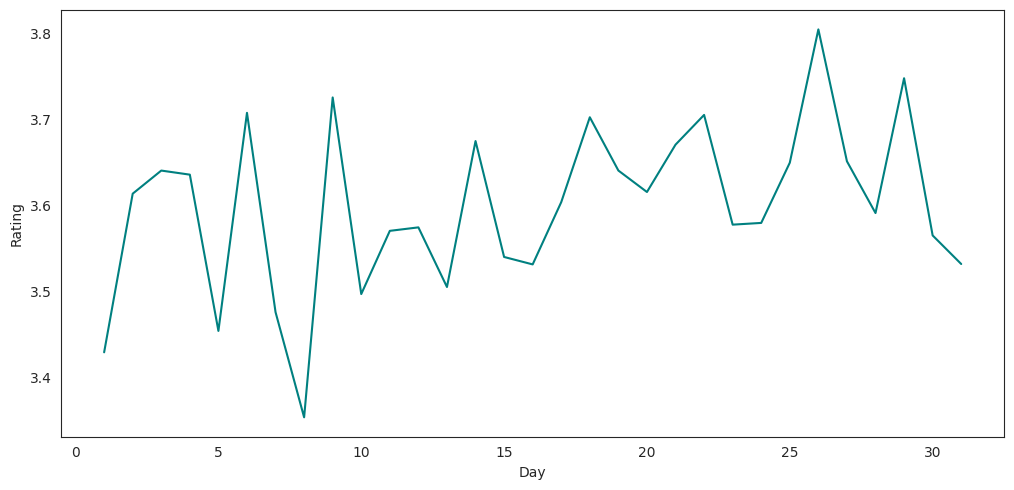

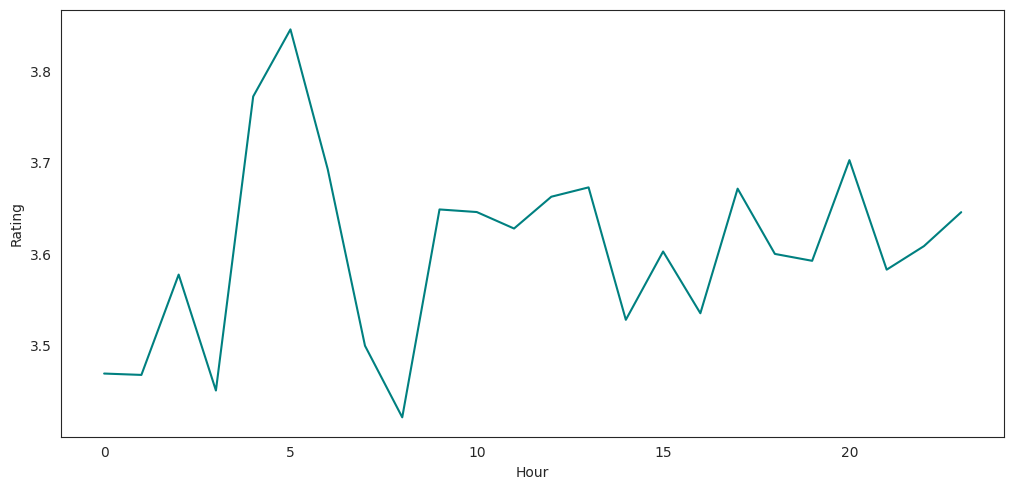

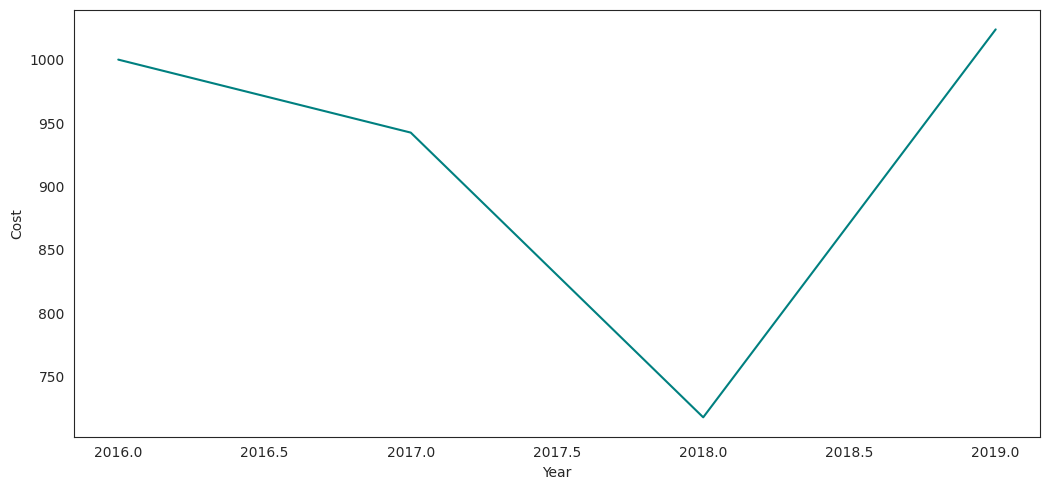

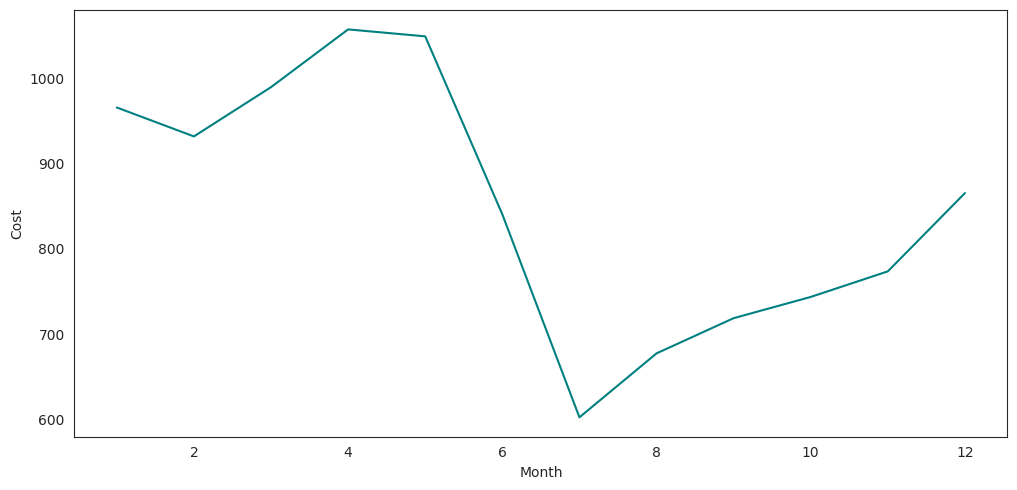

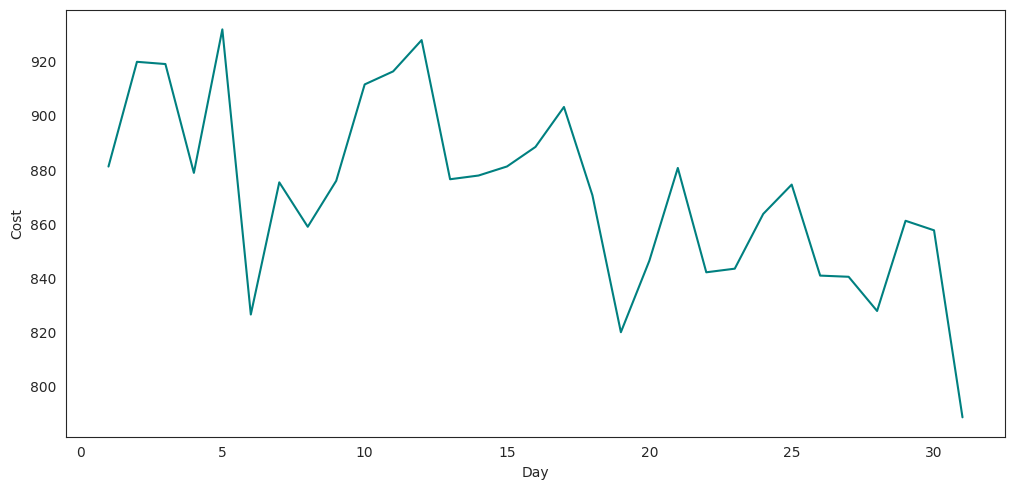

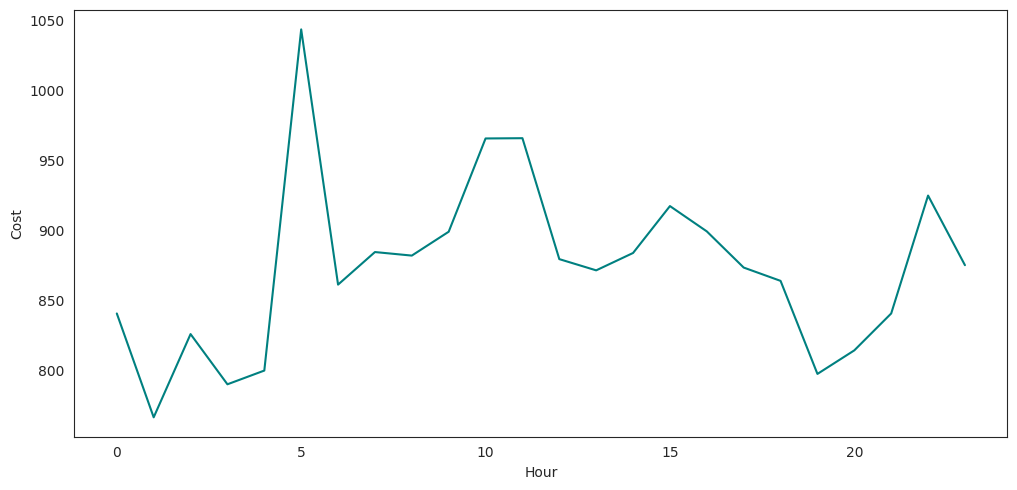

In [42]:
for feature in ['Rating', 'Cost']:
  for i,j in zip(['Year','Month','Day','Hour'],range(1,5)):
    plt.subplots(figsize=(40, 5))
    plt.subplot(1,4,j)
    sns.lineplot(x = df[i], y=df[feature], estimator= 'mean', ci=None, color = 'Teal')
    plt.tight_layout()

##### 1. Why did you pick the specific chart?


line charts are particularly useful when you want to visualize and analyze data that exhibits a continuous relationship or change over time. They provide a straightforward and effective way to represent trends, compare multiple variables, and communicate insights in a visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?



*   **Rating**:
The mean ratings range between 3.5:4. Based on that, here are the observstons:
  *   Year: The ratings  tends to decrease till the end of 2017 and then recovers.
  *   Month: There is significant low rating in the month of June and September. Where as May and July have improved rating
  *   Day: There is a gradual incease in the rating from start of the month to month end with high variation in the beginning.
  *   Hour: 5 A.M. orders tends to give better rating as compared to the rest of the day.

*  **Cost**: The mean Year range between 700:1000. Based on that, here are the observstons:
  *   Year: Same as Ratings but he V shape recovery is huge after end of 2017.
  *   Month: For Some reason yet to find the Sales in June were hugely affected.
  *   Day: The Spending power of the customers decreases as the month comes to end
  *   Hour: 5 A.M. orders even have Expensive orders.














##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the analysis can indeed help create a positive business impact. Here's a summary of the insights and their potential implications:

**Positive Business Impact:**
1. **Rating**:
   - Observations based on year, month, day, and hour can help identify patterns and trends in customer ratings. Understanding these patterns can help the business make strategic decisions to improve customer satisfaction and increase positive ratings.
   - The recovery in ratings after the end of 2017 indicates that the business has taken measures to address previous issues and has successfully improved customer experience.

2. **Cost**:
   - Analyzing the spending patterns based on year, month, day, and hour can provide valuable insights into customer behavior and preferences. This information can be used to optimize pricing strategies, identify peak demand periods, and tailor promotions to boost sales.
   - The higher costs associated with orders placed at 5 A.M. can be an opportunity for the business to offer premium or specialized products during that time to cater to customers who are willing to spend more.

**Negative Growth Implications:**
1. **Rating**:
   - The lower ratings observed in June and September can be a cause for concern. Further investigation is needed to identify the underlying reasons for the drop in ratings during these months. Addressing any issues or shortcomings during these periods can help prevent negative growth and maintain customer satisfaction.

2. **Cost**:
   - The significant impact on sales observed in June requires further investigation. Understanding the factors contributing to this decline can help the business develop strategies to mitigate the negative growth and regain customer confidence.
   - The decrease in spending power towards the end of the month may indicate financial constraints for customers. Offering promotions, discounts, or affordable meal options during this period can help mitigate the negative impact and maintain customer loyalty.

Overall, the insights gained from analyzing the rating and cost data can guide the business in making data-driven decisions to enhance customer satisfaction, optimize pricing strategies, and address any issues that may lead to negative growth.

#### Chart - 8 to 11 Restaurants Rating and Cost Analysis

In [43]:
highest_rated_restro = pd.DataFrame(df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending = False)[:30]).reset_index()

lowest_rated_restro = pd.DataFrame(df.groupby('Restaurant')['Rating'].mean().sort_values()[:30]).reset_index()

expensive_restro = pd.DataFrame(df.groupby('Restaurant')['Cost'].mean().sort_values(ascending = False)[:30]).reset_index()

inexpensive_restro = pd.DataFrame(df.groupby('Restaurant')['Cost'].mean().sort_values()[:30]).reset_index()

In [44]:
highest_rated_restro[:10]

Restaurant  Rating
0                AB's - Absolute Barbecues    4.88
1                                   B-Dubs    4.81
2           3B's - Buddies, Bar & Barbecue    4.76
3                                 Paradise    4.70
4                                 Flechazo    4.66
5                           The Indi Grill    4.60
6          Zega - Sheraton Hyderabad Hotel    4.45
7               Over The Moon Brew Company    4.34
8                          Beyond Flavours    4.28
9  Cascade - Radisson Hyderabad Hitec City    4.26

In [45]:
inexpensive_restro[:10]

Restaurant   Cost
0                           Amul  150.0
1            Mohammedia Shawarma  150.0
2             Hunger Maggi Point  200.0
3                      KS Bakers  200.0
4                  Momos Delight  200.0
5                 Asian Meal Box  200.0
6       Shah Ghouse Spl Shawarma  300.0
7                    Cream Stone  350.0
8  The Old Madras Baking Company  350.0
9                       Tempteys  350.0

From the Four Horizontal bar charts, collectively this following points can be observed:



*   Hotels with high ratings falls on the more costly side.
*   Bar and restro  



In [46]:
df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Total_Review  Followers  \
0 2019-05-25 15:54:00         0             1        2.0   
1 2019-05-25 14:20:00         0             3        2.0   
2 2019-05-24 22:54:00         0             2        3.0   
3 2019-05-24 22:11:00         0             1        1.0   
4 2019-05-24 21:37:00         0             3        2.0   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings  Year  Month  Week  Day  Hour  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   25    15  
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   25    14  
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   24    22  
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   24    22  
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   24    21

In [47]:
df[df['Rating'] < 2]

Restaurant              Reviewer  \
14     Beyond Flavours         Kankaria.ritu   
66     Beyond Flavours           Tejaswi Rao   
79     Beyond Flavours            Vignesh Rk   
80     Beyond Flavours          Surya Sharma   
84     Beyond Flavours      Sreshta Ladegaam   
...                ...                   ...   
9882  Chinese Pavilion    Aishwarya Banerjee   
9895  Chinese Pavilion       Korak Mukherjee   
9904  Chinese Pavilion       Aishvarya Reddy   
9956  Chinese Pavilion  Shiladitya Chaudhury   
9959  Chinese Pavilion             Ramandeep   

                                                 Review  Rating  \
14    We ordered corn cheese balls, manchow soup and...     1.0   
66    we went for a team lunch, such a worst restaur...     1.0   
79    I would like to introduce this restaurant to a...     1.0   
80    Hostile staff, okeish food, not so great ambia...     1.0   
84    This was my worst experience at a restaurant e...     1.0   
...                                                 ...     ...   
9882  Not just the food the service in this place is...     1.0   
9895  I was here last night with 2 of my friends. We...     1.0   
9904  I have been to this place on a sunday with my ...     1.0   
9956  Chinese Pavilion in Banjara HIlls was the firs...     1.5   
9959  Bad rating is mainly because of "Chicken Bone ...     1.5   

                    Time  Pictures  Total_Review  Followers  \
14   2019-05-22 21:19:00         0             1        0.0   
66   2019-05-15 03:26:00         0             1       24.0   
79   2019-05-11 10:06:00         6            13       67.0   
80   2019-05-10 23:24:00         0             2       10.0   
84   2019-05-09 12:37:00         0            25      722.0   
...                  ...       ...           ...        ...   
9882 2019-01-25 20:55:00         0             3       29.0   
9895 2018-05-29 16:02:00         1             9        0.0   
9904 2018-01-19 08:04:00         0             4       38.0   
9956 2016-06-05 10:49:00         0             6        3.0   
9959 2016-06-03 10:37:00         3            65      423.0   

                                                  Links  Cost  \
14    https://www.zomato.com/hyderabad/beyond-flavou...   800   
66    https://www.zomato.com/hyderabad/beyond-flavou...   800   
79    https://www.zomato.com/hyderabad/beyond-flavou...   800   
80    https://www.zomato.com/hyderabad/beyond-flavou...   800   
84    https://www.zomato.com/hyderabad/beyond-flavou...   800   
...                                                 ...   ...   
9882  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9895  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9904  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9956  https://www.zomato.com/hyderabad/chinese-pavil...  1000   
9959  https://www.zomato.com/hyderabad/chinese-pavil...  1000   

                                               Cuisines  \
14    Chinese, Continental, Kebab, European, South I...   
66    Chinese, Continental, Kebab, European, South I...   
79    Chinese, Continental, Kebab, European, South I...   
80    Chinese, Continental, Kebab, European, South I...   
84    Chinese, Continental, Kebab, European, South I...   
...                                                 ...   
9882                                   Chinese, Seafood   
9895                                   Chinese, Seafood   
9904                                   Chinese, Seafood   
9956                                   Chinese, Seafood   
9959                                   Chinese, Seafood   

                                            Timings  Year  Month  Week  Day  \
14    12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    21   22   
66    12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    20   15   
79    12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5    19   11   
80    12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  2019      5   

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

Text(0.5, 1.0, 'Based on Rating')

<Axes: title={'center': 'Based on Rating'}, xlabel='Rating', ylabel='Restaurant'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

Text(0.5, 1.0, 'Based on Rating')

<Axes: title={'center': 'Based on Rating'}, xlabel='Rating', ylabel='Restaurant'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

Text(0.5, 1.0, 'Based on Rating')

Text(0.5, 1.0, 'Based on Cost')

<Axes: title={'center': 'Based on Cost'}, xlabel='Cost', ylabel='Restaurant'>

(<Figure size 4000x500 with 1 Axes>, <Axes: >)

<Axes: >

Text(0.5, 1.0, 'Based on Rating')

Text(0.5, 1.0, 'Based on Cost')

<Axes: title={'center': 'Based on Cost'}, xlabel='Cost', ylabel='Restaurant'>

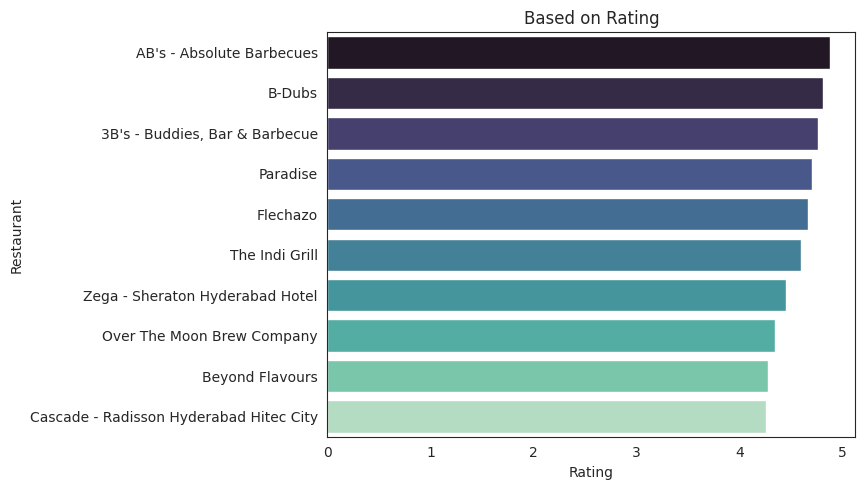

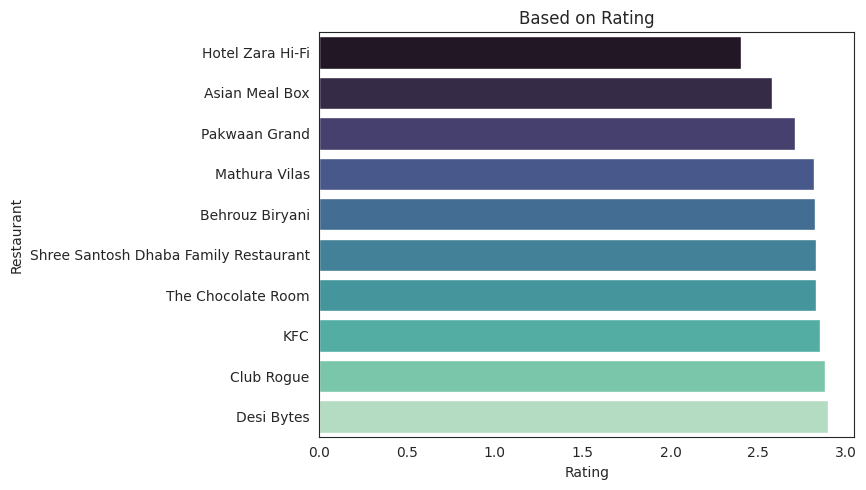

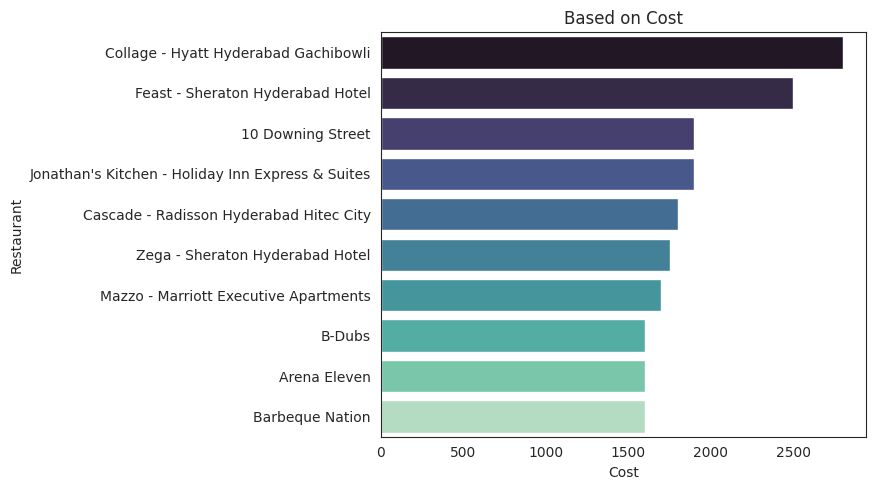

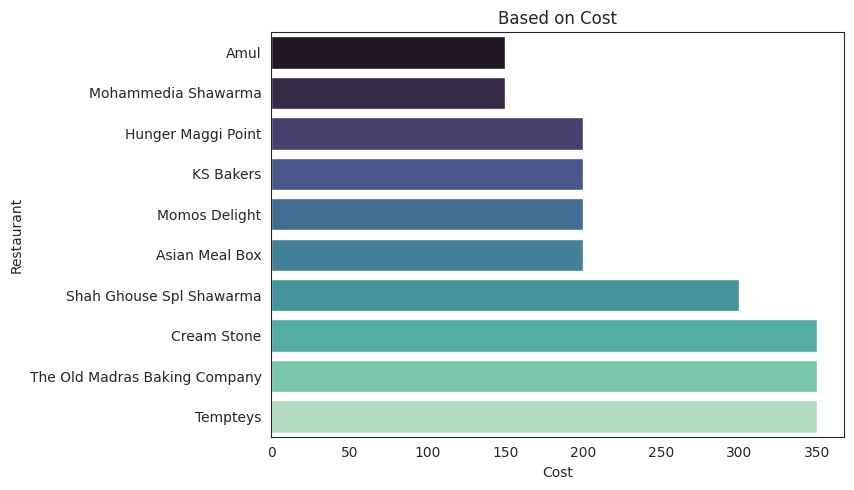

In [48]:
# Chart 8A and 8B and 9A and 9B
param_restro = [highest_rated_restro, lowest_rated_restro, expensive_restro, inexpensive_restro]
for i in param_restro:
  plt.subplots(figsize=(40, 5))
  plt.subplot(1,5,j)
  try:
    plt.title('Based on Rating')
    sns.barplot(data = i[:10], x='Rating', y='Restaurant',palette='mako')
  except:
    plt.title('Based on Cost')
    sns.barplot(data = i[:10], x='Cost', y='Restaurant',palette='mako')
  plt.tight_layout()

In [49]:
def wordcloud(col_name, boolean):
  plt.figure(figsize=(15,8))
  text = " ".join(i for i in df.sort_values(col_name,ascending=boolean).Restaurant[:2000])

  # Creating word_cloud with text as argument in .generate() method
  wc = WordCloud(width = 1400, height = 1400,collocations = False, background_color='rgba(255, 255, 255, 0)', mode='RGBA').generate(text)

    # Get the default color for the wordcloud
  default_color = wc.to_array().mean(axis=2)

  # Create a new image with transparent background
  wordcloud_image = wc.to_image()
  wordcloud_image = wordcloud_image.convert('RGBA')

  # Set the transparency (alpha) of each pixel based on the default color
  pixels = wordcloud_image.load()
  width, height = wordcloud_image.size
  for y in range(height):
      for x in range(width):
          r, g, b, a = pixels[x, y]
          if (r, g, b) == (255, 255, 255):  # Adjust the RGB values to match the background color
              a = 0  # Set the alpha channel to 0 for transparent pixels
          pixels[x, y] = (r, g, b, a)

  # Display the generated Word Cloud
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

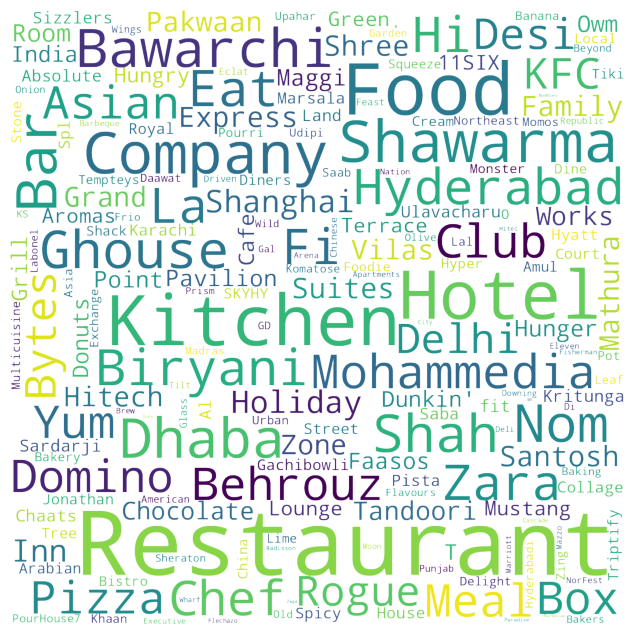

In [50]:
# Chart 10A
#Creating word cloud for lowly rated restaurants
wordcloud('Rating', True)

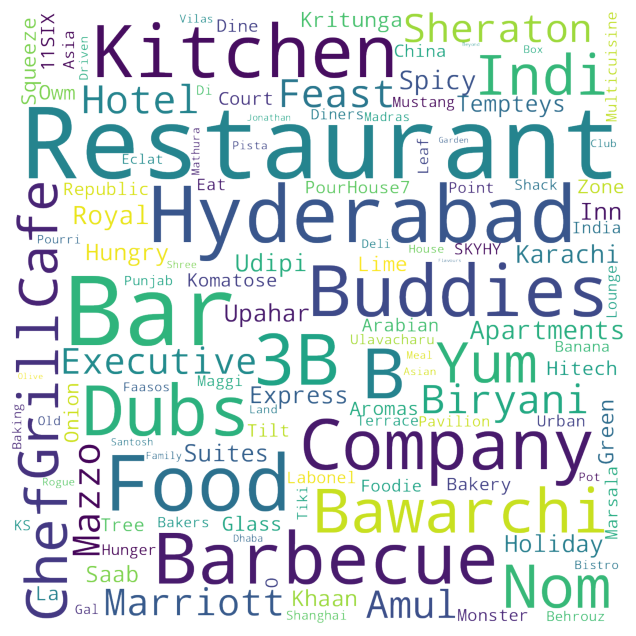

In [51]:
# Chart 10B
# Creating word cloud for highly rated restaurants
wordcloud('Rating', False)

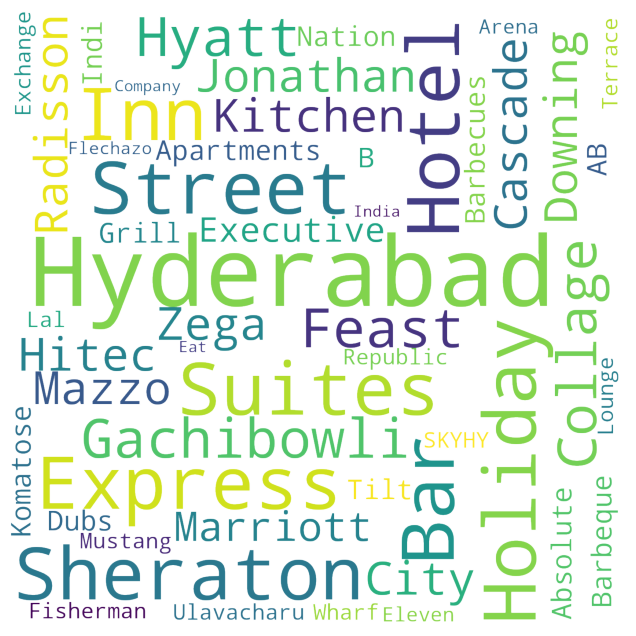

In [52]:
# Chart 11A
#Creating word cloud for expensive restaurants
wordcloud('Cost',False)

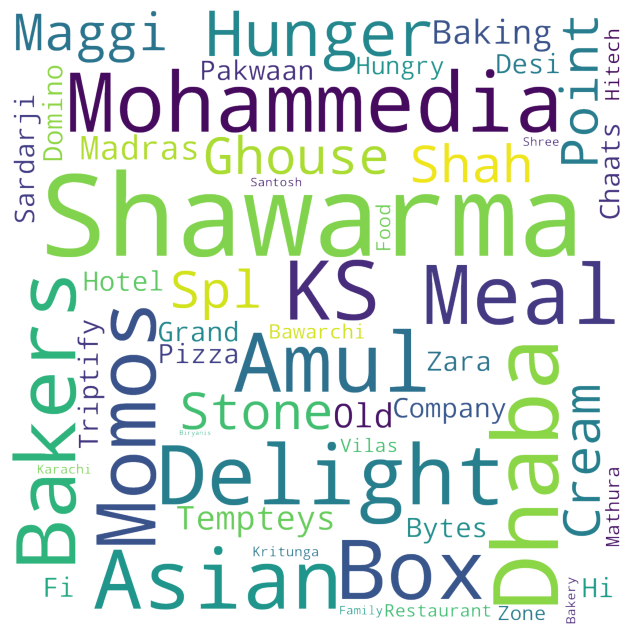

In [53]:
# Chart 11B
#Creating word cloud for inexpensive restaurants
wordcloud('Cost',True)

##### 1. Why did you pick the specific chart?

Answer Here.

*   Horizontal Bar Chart:

 Horizontal bar charts provide a straightforward and intuitive way to present and compare data, making them a popular choice for data visualization in various fields and applications.



*   Word Cloud:

  Word clouds are a popular and effective tool for exploring, summarizing, and visually representing text data, making them valuable in various domains such as data analysis, text mining, marketing, and social media analysis.




##### 2. What is/are the insight(s) found from the chart?

*   List item
*   List item


*   List item


*   List item

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 Reviewers

In [54]:
df_reviews['Reviewer'].value_counts()

Parijat Ray         13
Ankita              13
Kiran               12
Vedant Killa        11
Jay Mehta           11
                    ..
Anjana Dandekar      1
Shailesh Agarwal     1
Vinaya Chekuri       1
Sonal Ambani         1
Bhargava Krishna     1
Name: Reviewer, Length: 7446, dtype: int64

In [55]:
df_rating  = pd.DataFrame(df.groupby(['Reviewer'])['Rating'].mean().sort_values(ascending = False)).reset_index()

In [56]:
df_reviewer = df.sort_values(by = 'Followers', ascending = False)
df_reviewer = df_reviewer[['Reviewer', 'Followers','Total_Review']].drop_duplicates().reset_index(drop = True)
df_reviewer.head()
df_reviewer.shape

Reviewer  Followers  Total_Review
0    Satwinder Singh    13410.0           186
1         Eat_vth_me    13320.0            60
2       Samar Sardar    11329.0             8
3  Foodies Hyderabad     9494.0            31
4           Srinivas     7628.0            34

(7917, 3)

In [57]:
df_reviewer = pd.merge(df_reviewer, df_rating, on = 'Reviewer')
df_reviewer['Rating'] = round(df_reviewer['Rating'],1)


In [58]:
df_reviewer.head()

Reviewer  Followers  Total_Review  Rating
0    Satwinder Singh    13410.0           186     3.7
1         Eat_vth_me    13320.0            60     5.0
2       Samar Sardar    11329.0             8     3.5
3  Foodies Hyderabad     9494.0            31     4.5
4           Srinivas     7628.0            34     3.7

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [59]:
# Chart - 6 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [60]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [61]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [62]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [63]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [64]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [65]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [66]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [67]:
# Correlation Heatmap visualization code
def plot_corr(data, cmap='RdBu', annot=True, annot_kws={'size':12}, cbar=True, square=True, linewidths=.5, center=0):
    plt.figure(figsize=(20,10))
    mask = np.triu(np.ones_like(data.corr())) #Return copy of array with upper part of the triangle
    sns.heatmap(data.corr(),annot=annot, annot_kws=annot_kws, cmap=cmap,cbar=cbar, square=square, linewidths=linewidths, center=center, mask = mask)
    plt.show()

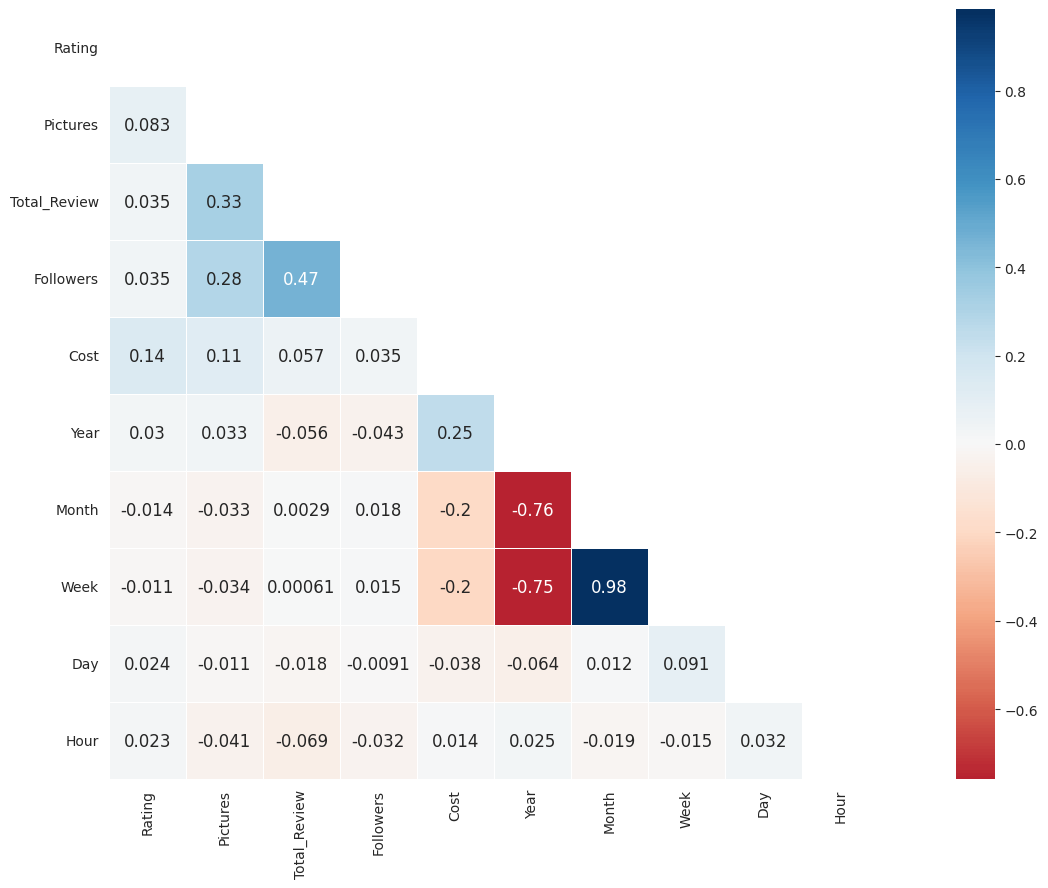

In [68]:
# relation = positive_corr_df.columns.tolist()[:-1] + negative_corr_df.columns.tolist()[:-1]
plot_corr(df)

##### 1. Why did you pick the specific chart?


Heat maps are commonly chosen for data visualization when there is a need to highlight patterns, trends, and relationships in a dataset using color gradients.

##### 2. What is/are the insight(s) found from the chart?

The variaables here dont show much of any correlation if we ignore Date time variables.

#### Chart - 15 - Pair Plot 

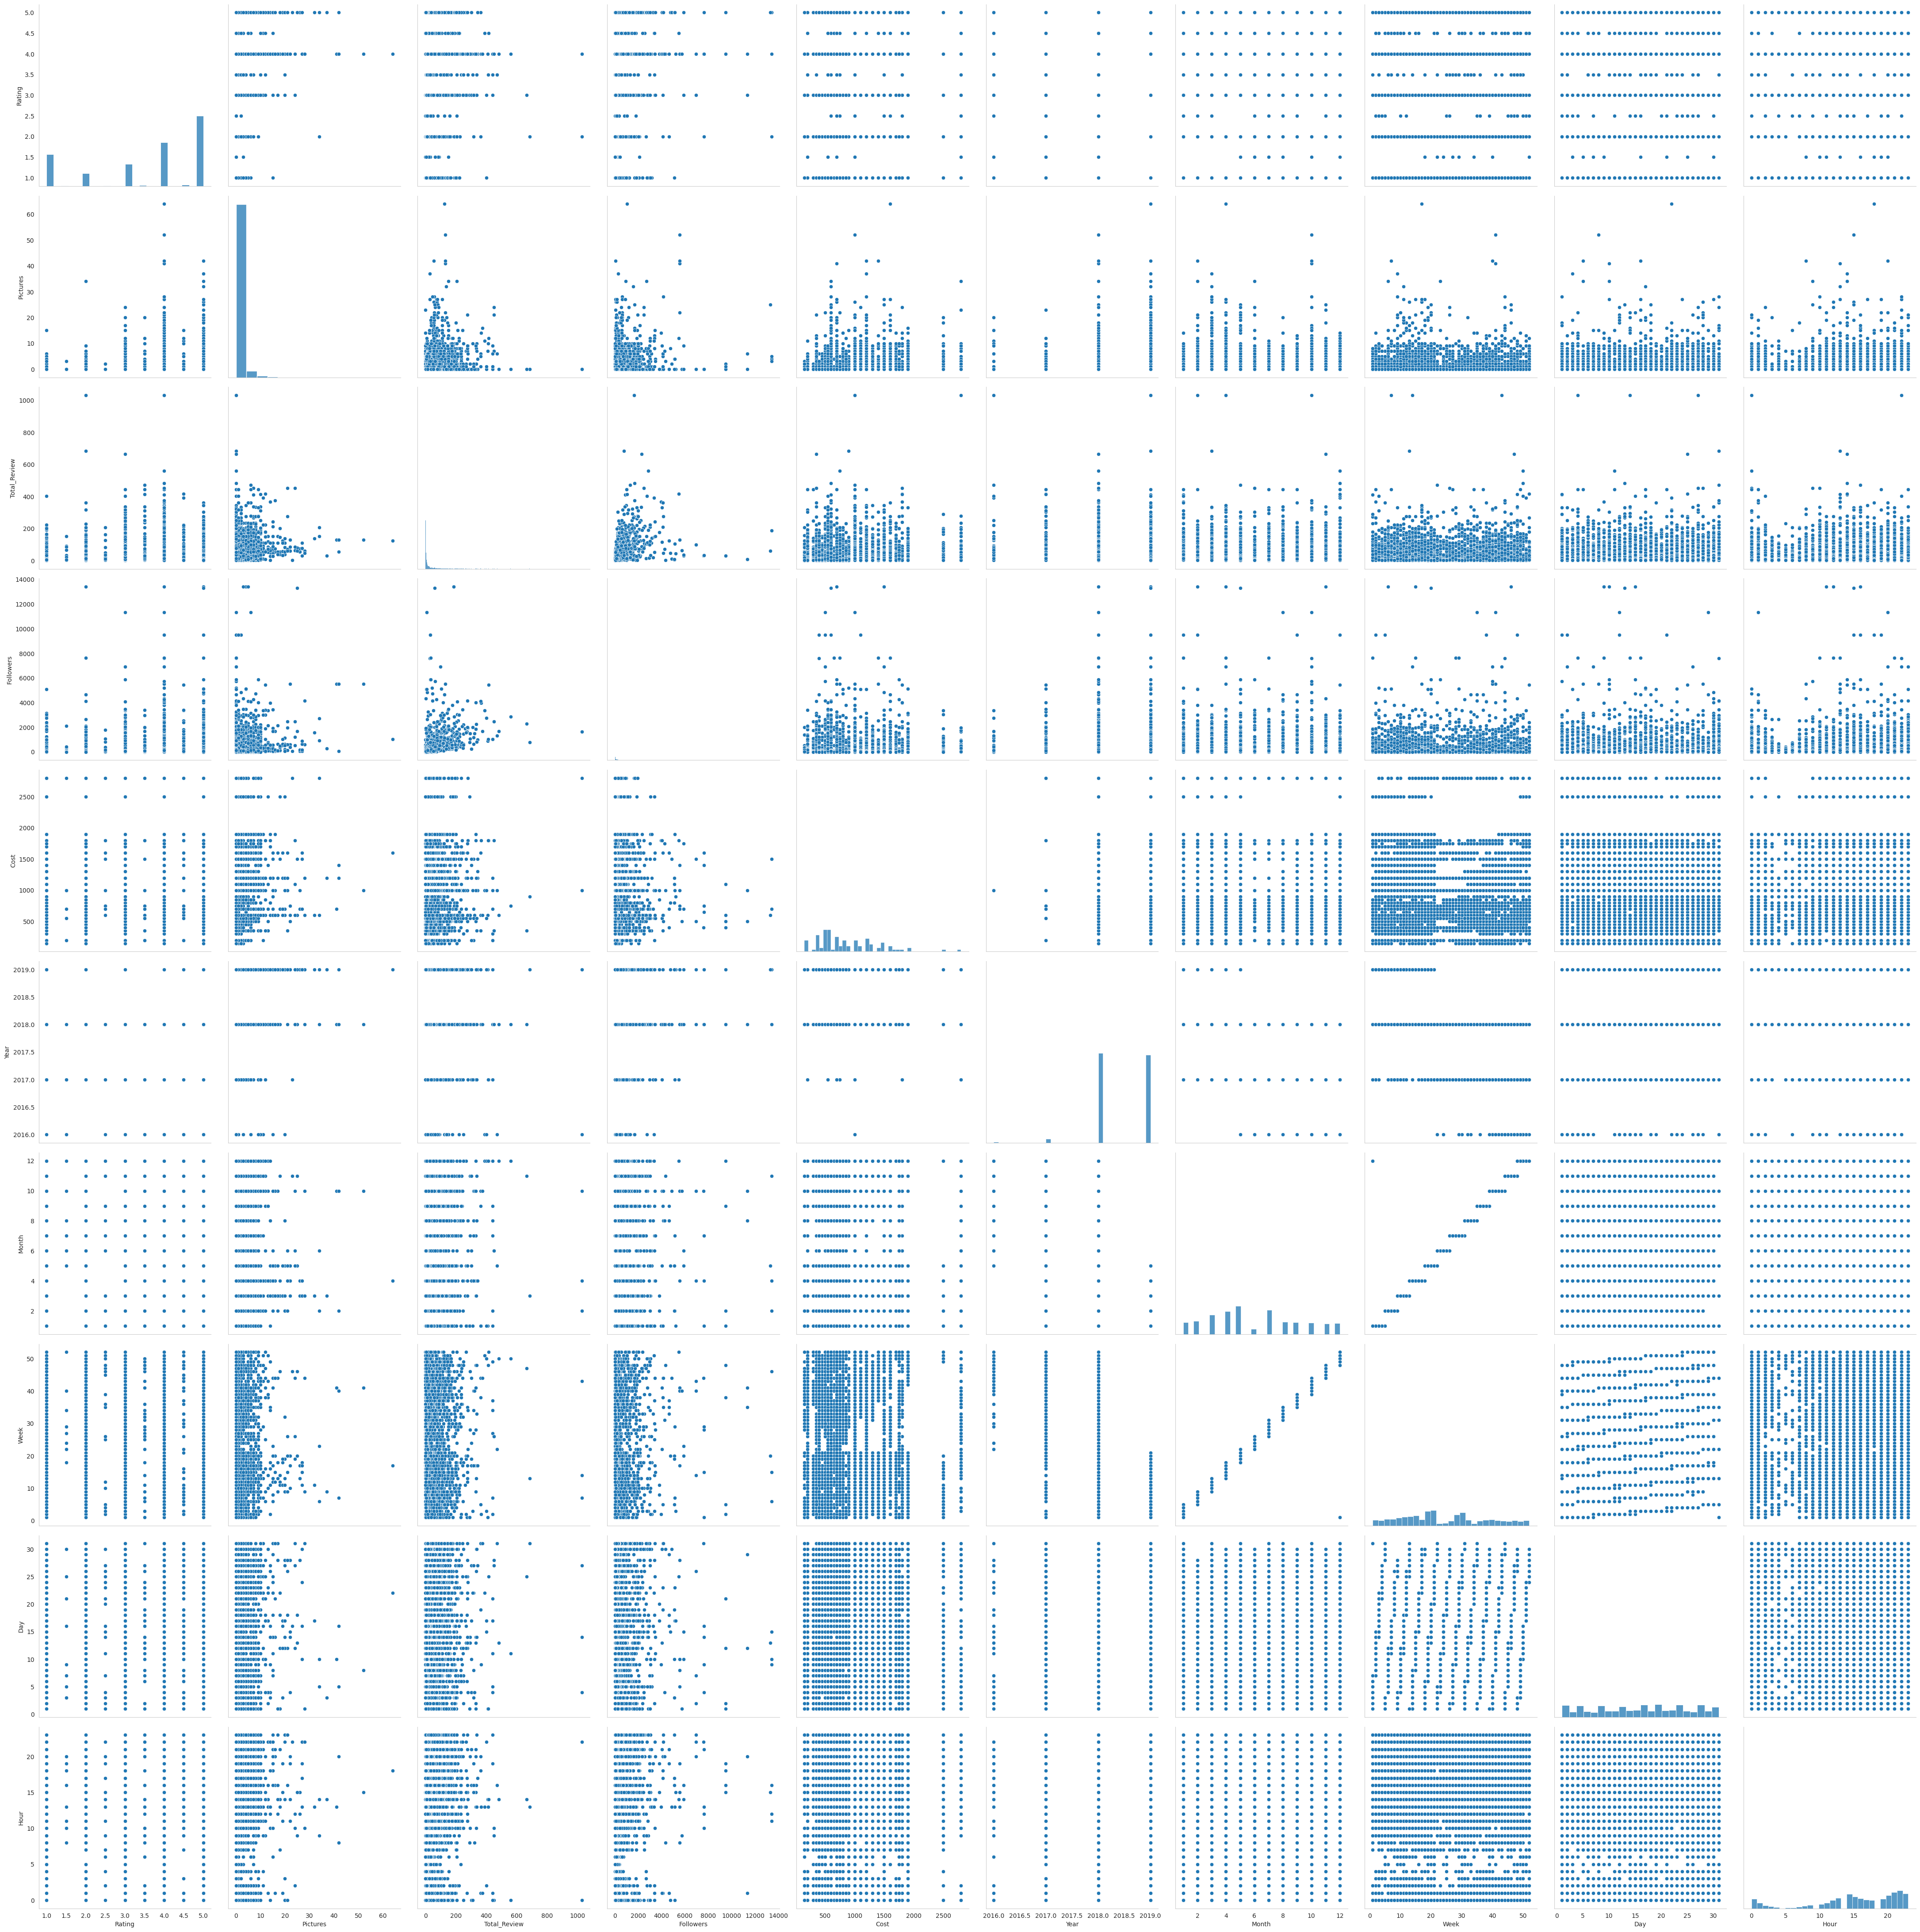

In [69]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

#plot the pair plot of all the required columns in the dataframe
pp=sns.pairplot(df)

pp.fig.set_size_inches(45,45)

##### 1. Why did you pick the specific chart?

Pair plots are chosen for data visualization to explore the relationships and patterns between multiple variables in a dataset, allowing for quick identification of correlations and trends.

##### 2. What is/are the insight(s) found from the chart?

There were no perticular insights.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Restaurant That have few Cuisine have lower Rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis**: There is no relationship between the number of cuisines a restaurant offers and its rating.

**Alternate Hypothesis**: Restaurants that offer fewer cuisines have lower ratings compared to restaurants that offer a larger variety of cuisines.

#### 2. Perform an appropriate statistical test.

In [70]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(df['Cuisines'], df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)
print(f'The value of p: {p}')

The value of p: 0.0


##### Which statistical test have you done to obtain P-Value?

I have used Chi - Square Test as a statistical test to obtain p-value and the result is as follows:

**Reject Null Hypothesis:** There is no relationship between the number of cuisines a restaurant offers and its rating.





##### Why did you choose the specific statistical test?

By performing the chi-squared test and obtaining the p-value, we can assess whether the number of cuisines a restaurant offers has a significant association with its rating. If the p-value is below the chosen significance level, we can conclude that there is evidence to suggest a relationship between these variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [73]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [74]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [75]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [76]:
# Expand Contraction

#### 2. Lower Casing

In [77]:
# Lower Casing

#### 3. Removing Punctuations

In [78]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [79]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [80]:
# Remove Stopwords

In [81]:
# Remove White spaces

#### 6. Rephrase Text

In [82]:
# Rephrase Text

#### 7. Tokenization

In [83]:
# Tokenization

#### 8. Text Normalization

In [84]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [85]:
# POS Taging

#### 10. Text Vectorization

In [86]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [87]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [88]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [89]:
# Transform Your data

### 6. Data Scaling

In [90]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [91]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [92]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [93]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [94]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [97]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [99]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [102]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [103]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***